<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/Approach_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **How to Approach Machine Learning Projects**

![](https://i.imgur.com/kKdAALX.png)

A step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import seaborn as sns
import os
import matplotlib
import plotly.express as px

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. It's important to understand the business requirements, modeling objectives and the nature of the data available before you start building a machine learning model.

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)):

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Step 3 - Download, clean & explore the data and create new features

<img src="https://i.imgur.com/0f7foe7.png" width="640">

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [4]:
os.listdir('/content/rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [5]:
ross_df = pd.read_csv('/content/rossmann-store-sales/train.csv', low_memory=False)

In [6]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
store_df = pd.read_csv('/content/rossmann-store-sales/store.csv')

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Pre-processing**

In [9]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df.shape

(1017209, 18)

In [11]:
test_df = pd.read_csv('/content/rossmann-store-sales/test.csv')

In [12]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
round(merged_df.describe().T, 2) # rounds the values upto 2 decimal points, and T -> Transpose

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [15]:
merged_df.duplicated().sum()

0

In [16]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [17]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])

In [18]:
merged_df['Date'].min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [19]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## **Exploratory Data Analysis & Visualization**


Objectives of exploratory data analysis:

1. Study the distributions of individual columns (uniform, normal, exponential)

2. Detect anomalies or errors in the data (e.g. missing/incorrect values)

3. Study the relationship of target column with other columns (linear, non-linear etc.)

4. Gather insights about the problem and the dataset

5. Come up with ideas for preprocessing and feature engineering

<Axes: xlabel='Sales', ylabel='Count'>

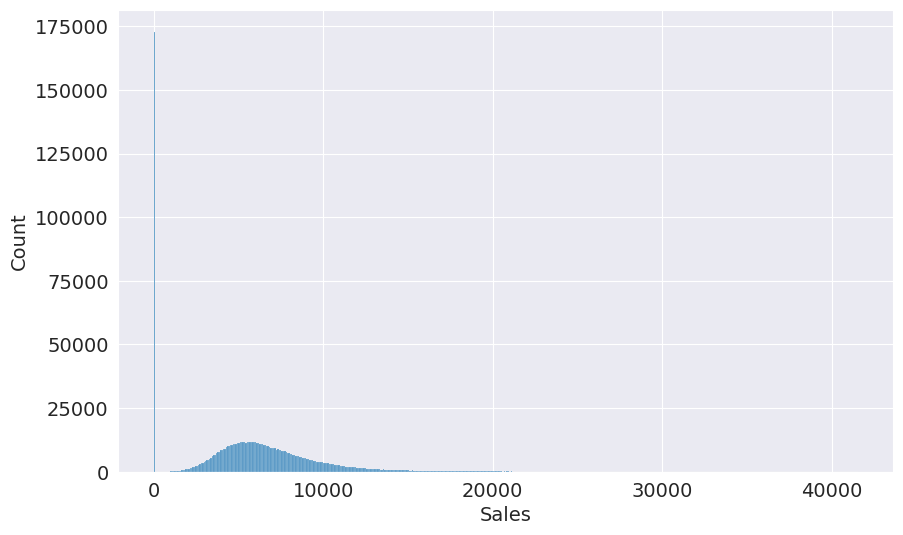

In [20]:
sns.histplot(data=merged_df, x="Sales")

Since the store was closed (close=0), there's such a huge line of 0 sales.

In [21]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [22]:
merged_df.Open.value_counts()[0]

172817

To make our modelling simple, we will exclude the data, where the store was closed, and there was no sales.

In [23]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

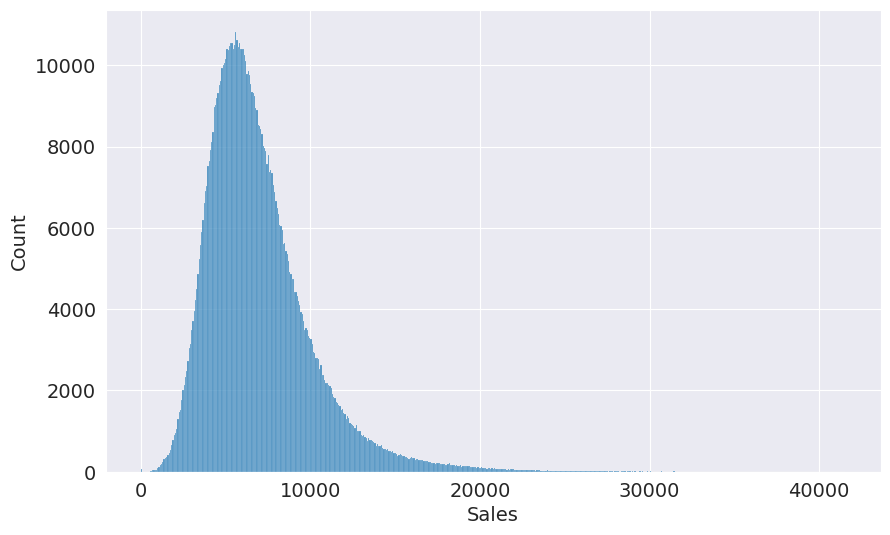

In [24]:
sns.histplot(data=merged_df, x='Sales')

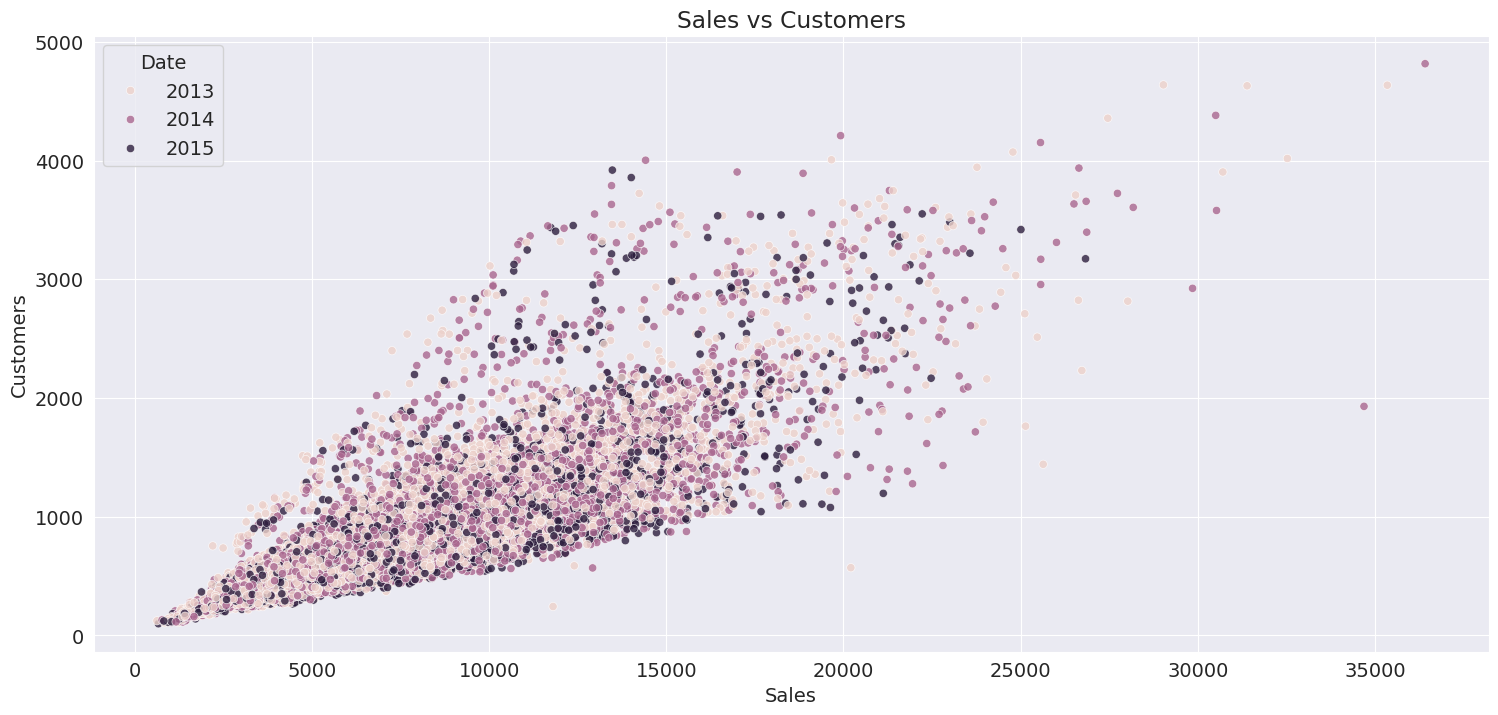

In [25]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(40000)
sns.scatterplot(data=temp_df, x='Sales', y='Customers', hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

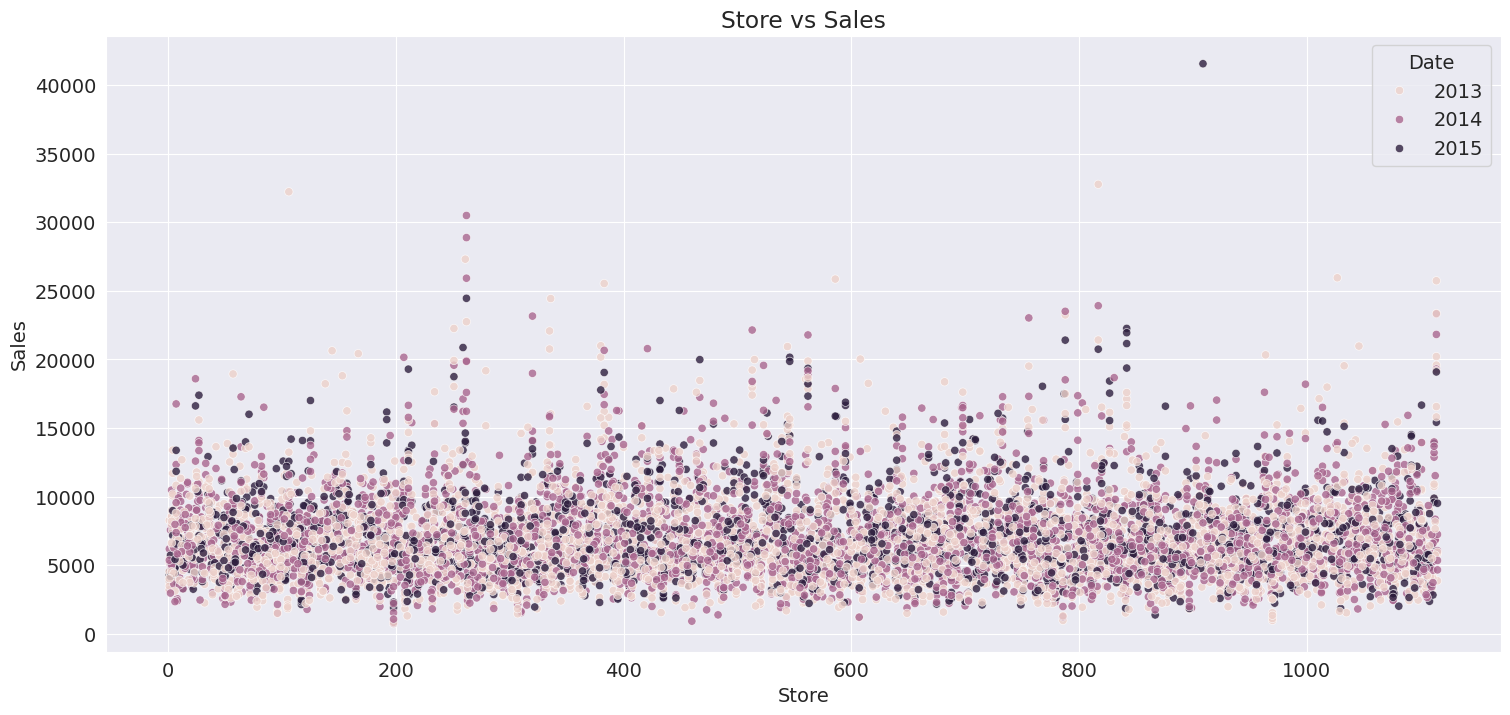

In [26]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(10000)
sns.scatterplot(data=temp_df, x='Store', y='Sales', hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Store vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

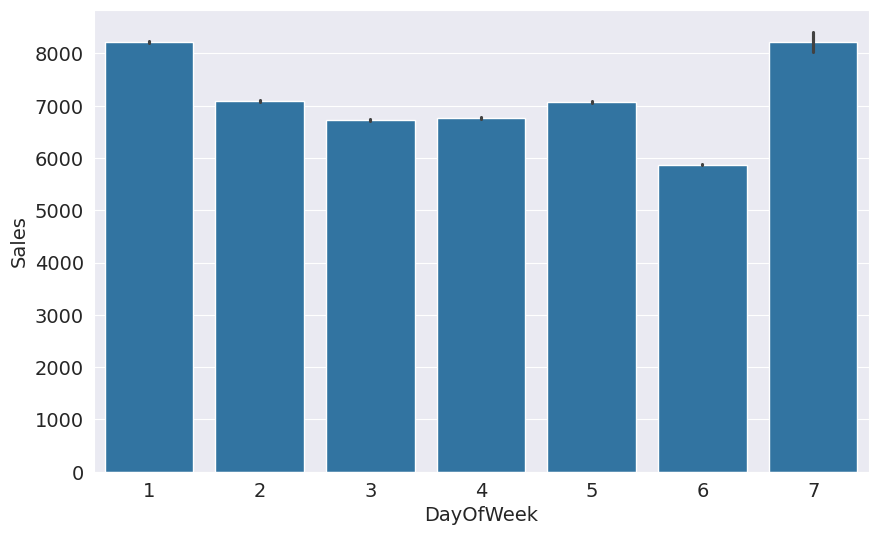

In [27]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

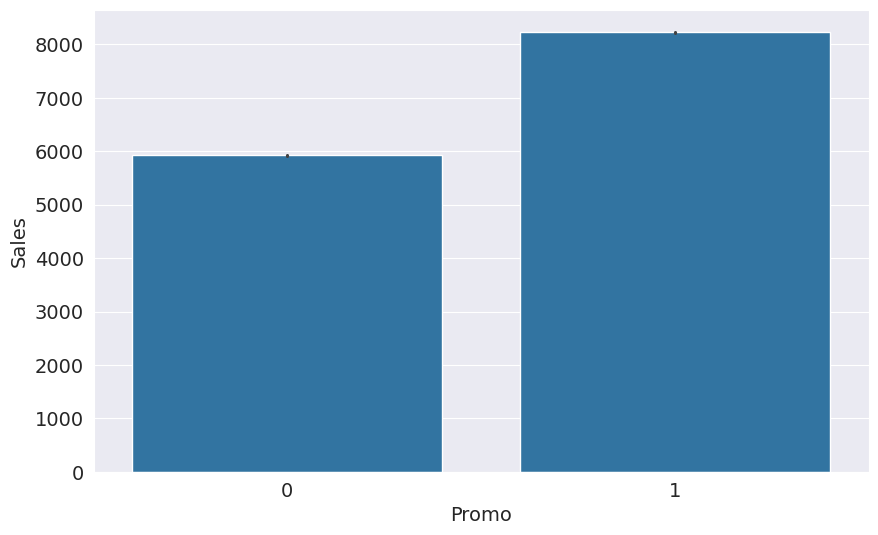

In [28]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

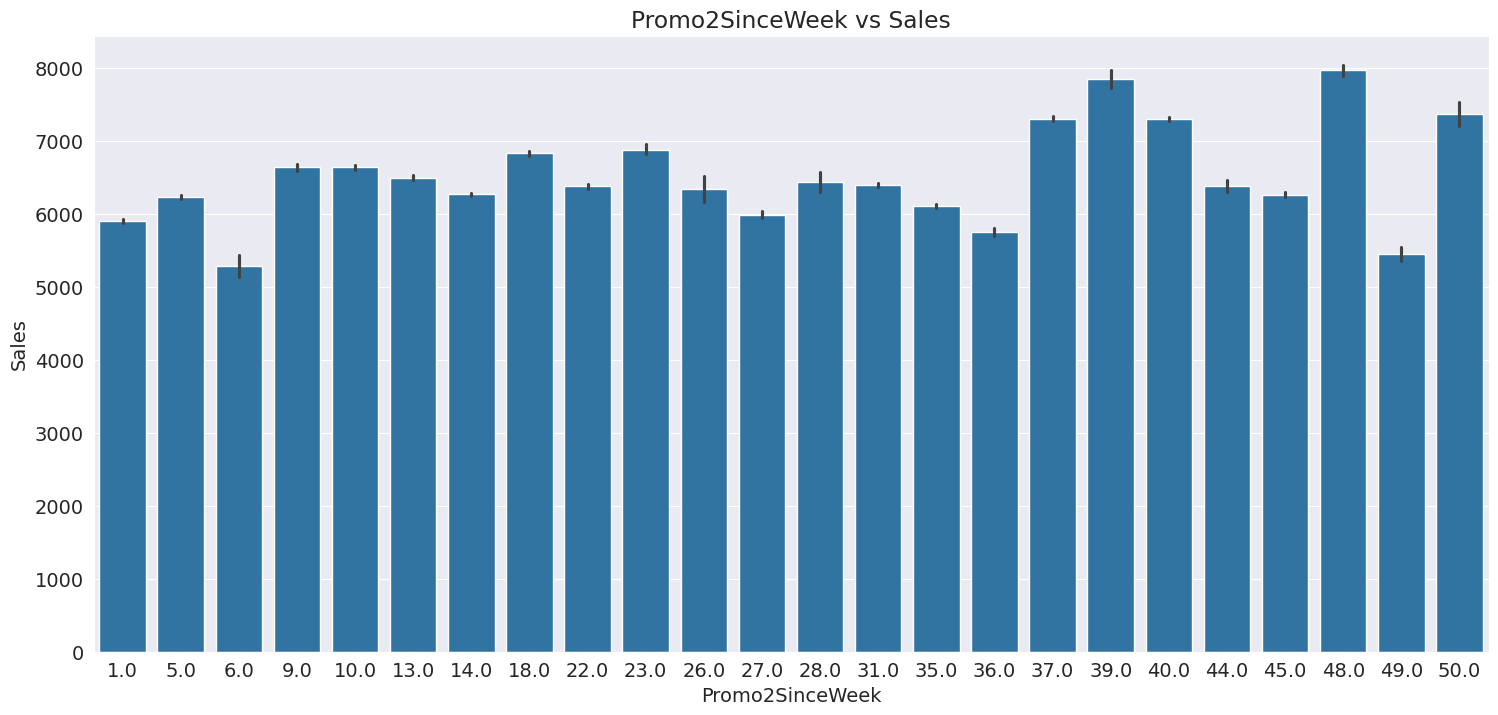

In [30]:
plt.figure(figsize=(18, 8))
sns.barplot(data=merged_df, x='Promo2SinceWeek', y='Sales')
plt.title('Promo2SinceWeek vs Sales')
plt.show()

## **Feature Engineering**

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.

For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End

In [31]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [32]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

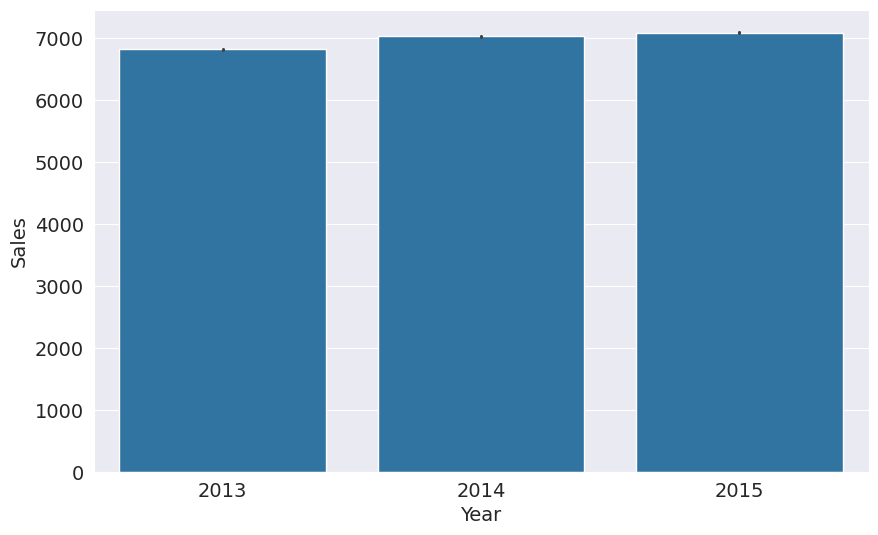

In [33]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

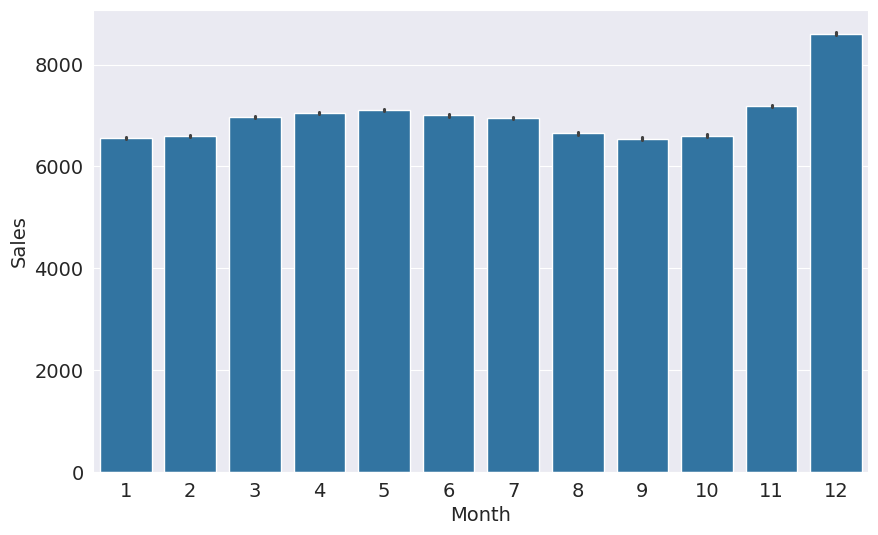

In [34]:
sns.barplot(data=merged_df, x='Month', y='Sales')

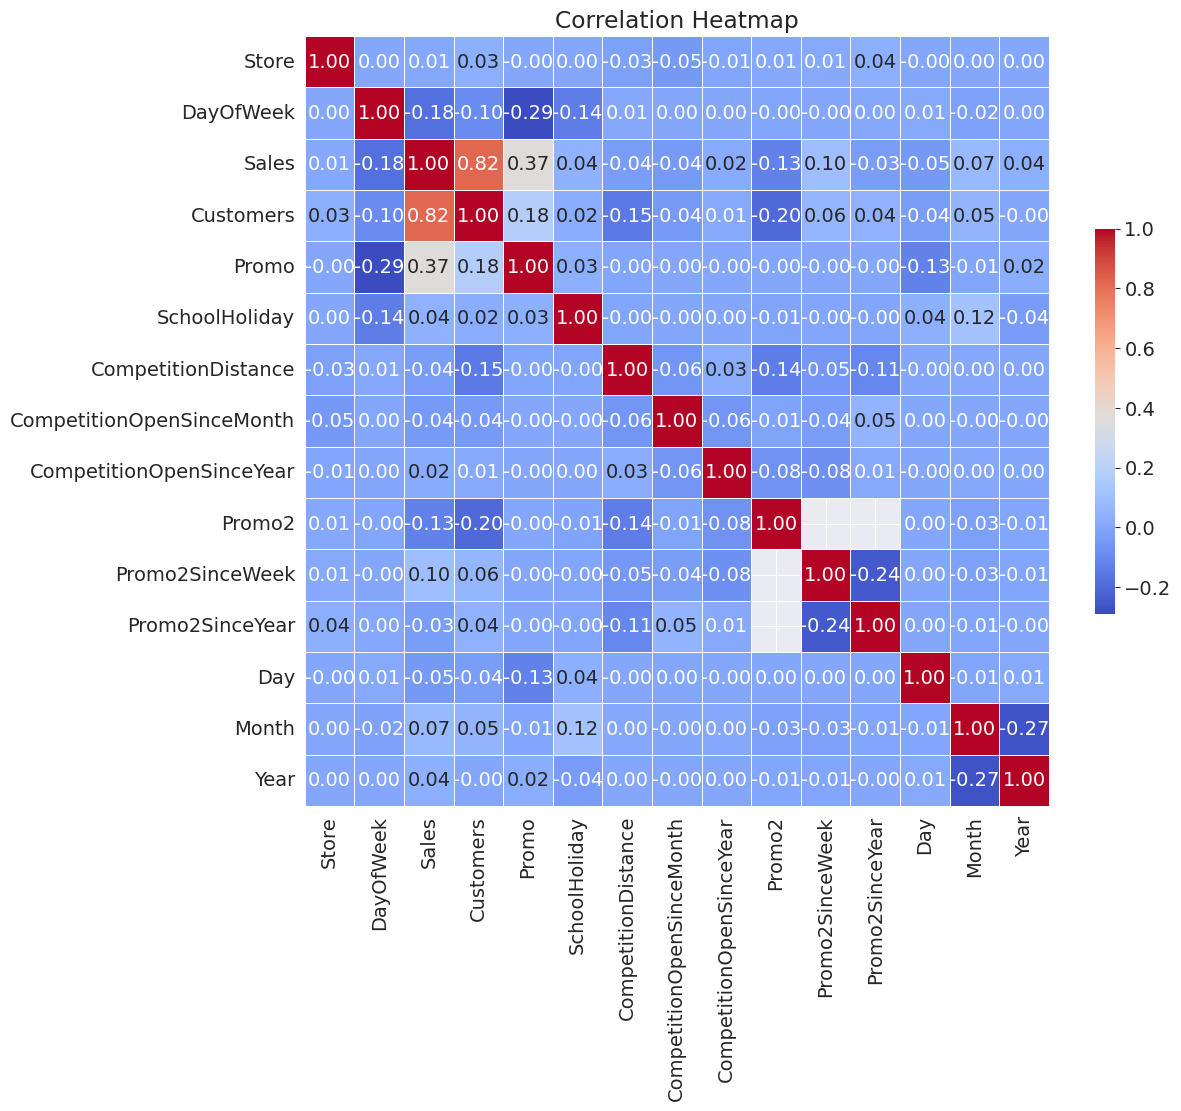

In [41]:
# Drop the 'Open' column from the DataFrame
df_without_open = merged_df.drop(columns=['Open'])

# Select only numeric columns
numeric_df = df_without_open.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5})

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()



Using date information, we can also create new current columns like:

1. Weather on each day
2. Whether the date was a public holiday
3. Whether the store was running a promotion on that day.


## Step 4 - Create a training/test/validation split and prepare the data for training

<img src="https://i.imgur.com/XZ9aP10.png" width="640">

## **Train/Test/Validation Split**

We'll use last 25% of rows for validation set, after ordering by date.

i.e. according to date, firt 75% of the data will be used to train the model, and the remaining 25% of data will be used for validating the model.

In [35]:
len(merged_df)

844392

In [36]:
train_size = int(len(merged_df) * 0.75)
train_size

633294

In [37]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [38]:
len(train_df), len(val_df)

(633294, 211098)

In [42]:
# train
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [43]:
# validate
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [44]:
# test
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Input and Target columns

We can't use no. of columns as the input columns, as it's not given in the test dataset. Also, we don't need to use all the available columns, we can just start out with a small subset.

In [45]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [46]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [47]:
target_col = 'Sales'

Let's seperate out numeric and categorical columns too.

In [48]:
merged_df[input_cols].nunique()

Store            1115
DayOfWeek           7
Promo               2
StateHoliday        4
SchoolHoliday       2
StoreType           4
Assortment          3
Day                31
Month              12
Year                3
dtype: int64

Linear models will suffer, when categorical data is treated as numericla data, but Decision Tree should generally be able to sort it out.

In [49]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [50]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [52]:
test_inputs = merged_test_df[input_cols].copy()

In [51]:
numerical_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

## **Imputation, Scaling and Encode**

Fill the missing data from the numeric columns, and scale them from (0,1)

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
impute = SimpleImputer(strategy='mean').fit(train_inputs[numerical_cols])

In [55]:
train_inputs[numerical_cols] = impute.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = impute.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = impute.transform(val_inputs[numerical_cols])

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler().fit(train_inputs[numerical_cols])

In [58]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [65]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [67]:
train_inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'Day', 'Month', 'Year', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [68]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]

In [69]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Step 5 - Create quick & easy baseline models to benchmark future models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

### Fixed/Random Guess

Let's define a model, where everytime it returns the mean of the data.

In [70]:
def return_mean(inputs):
  return np.full(len(inputs), merged_df.Sales.mean())

In [71]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate RMSE score for actual target values and the values predicted by the dumb model.

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(train_preds, train_targets, squared=False)

3082.450443277419

In [74]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

3168.6033635047716

Thus, we can say that our dumb model is off by approx $3000

In [96]:
def random_guess(inputs):
  # lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
  lo, hi = 3000, 18000
  return np.random.random(len(inputs)) * (hi - lo) + lo

In [97]:
train_preds = random_guess(X_train)
train_preds

array([ 5458.30053692, 13165.48753985,  6799.37911649, ...,
        5576.98536244,  4230.24591409, 16759.74676342])

In [98]:
mean_squared_error(train_preds, train_targets, squared=False)

6441.450817002566

In [99]:
mean_squared_error(random_guess(X_val), val_targets, squared=False)

6296.77846943939

## Baseline ML model

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
linreg = LinearRegression()

In [104]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [106]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7115. , 10581. ,  7036. , ...,  6243. ,  5999. ,  5618.5])

In [107]:
mean_squared_error(train_preds, train_targets, squared=False)

2741.5860353706703

In [108]:
val_preds = linreg.predict(X_val)
val_preds

array([5618.5, 5619. , 5999.5, ..., 8649. , 8404.5, 7844.5])

In [109]:
mean_squared_error(val_preds, val_targets, squared=False)

2817.656190781348

## Step 6 - Pick a strategy, train a model & tune hyperparameters

<img src="https://i.imgur.com/aRuE5mw.png" width="640">


### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)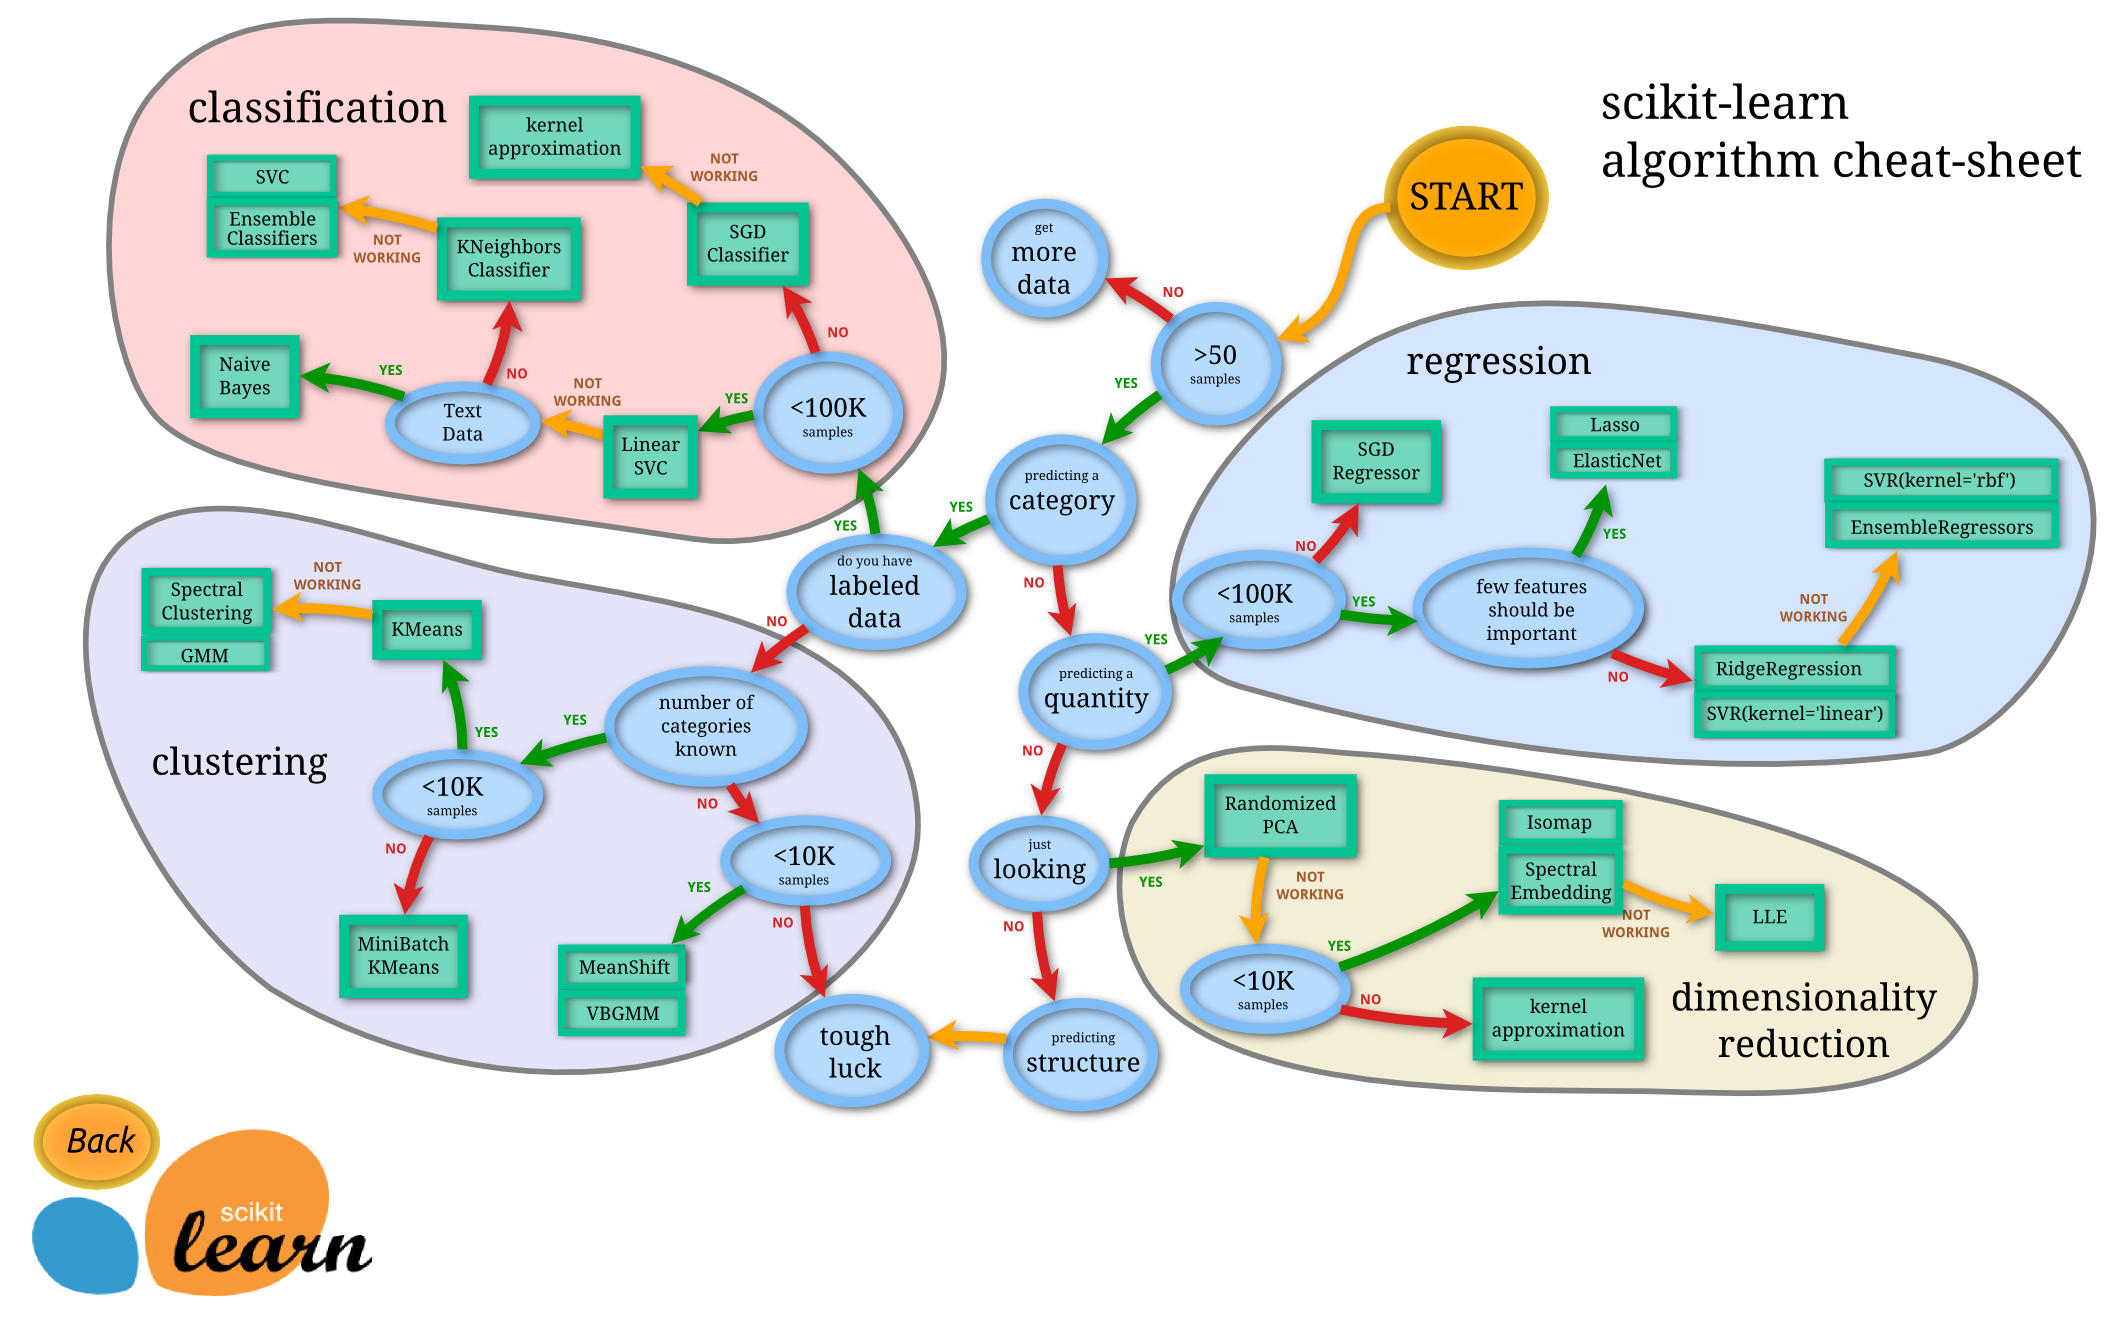


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

In [110]:
def try_model(model):
  model.fit(X_train, train_targets)

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
  val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
  return train_rmse, val_rmse

## Linear Models

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [112]:
try_model(LinearRegression())

(2741.5860353706703, 2817.656190781348)

In [113]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [114]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [115]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [116]:
try_model(SGDRegressor())

(2741.891378375481, 2818.155310791785)

## Tree Based Model

In [120]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [123]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

It seems that the tree model is far better than linear model.

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.267\nsquared_error = 20739758.

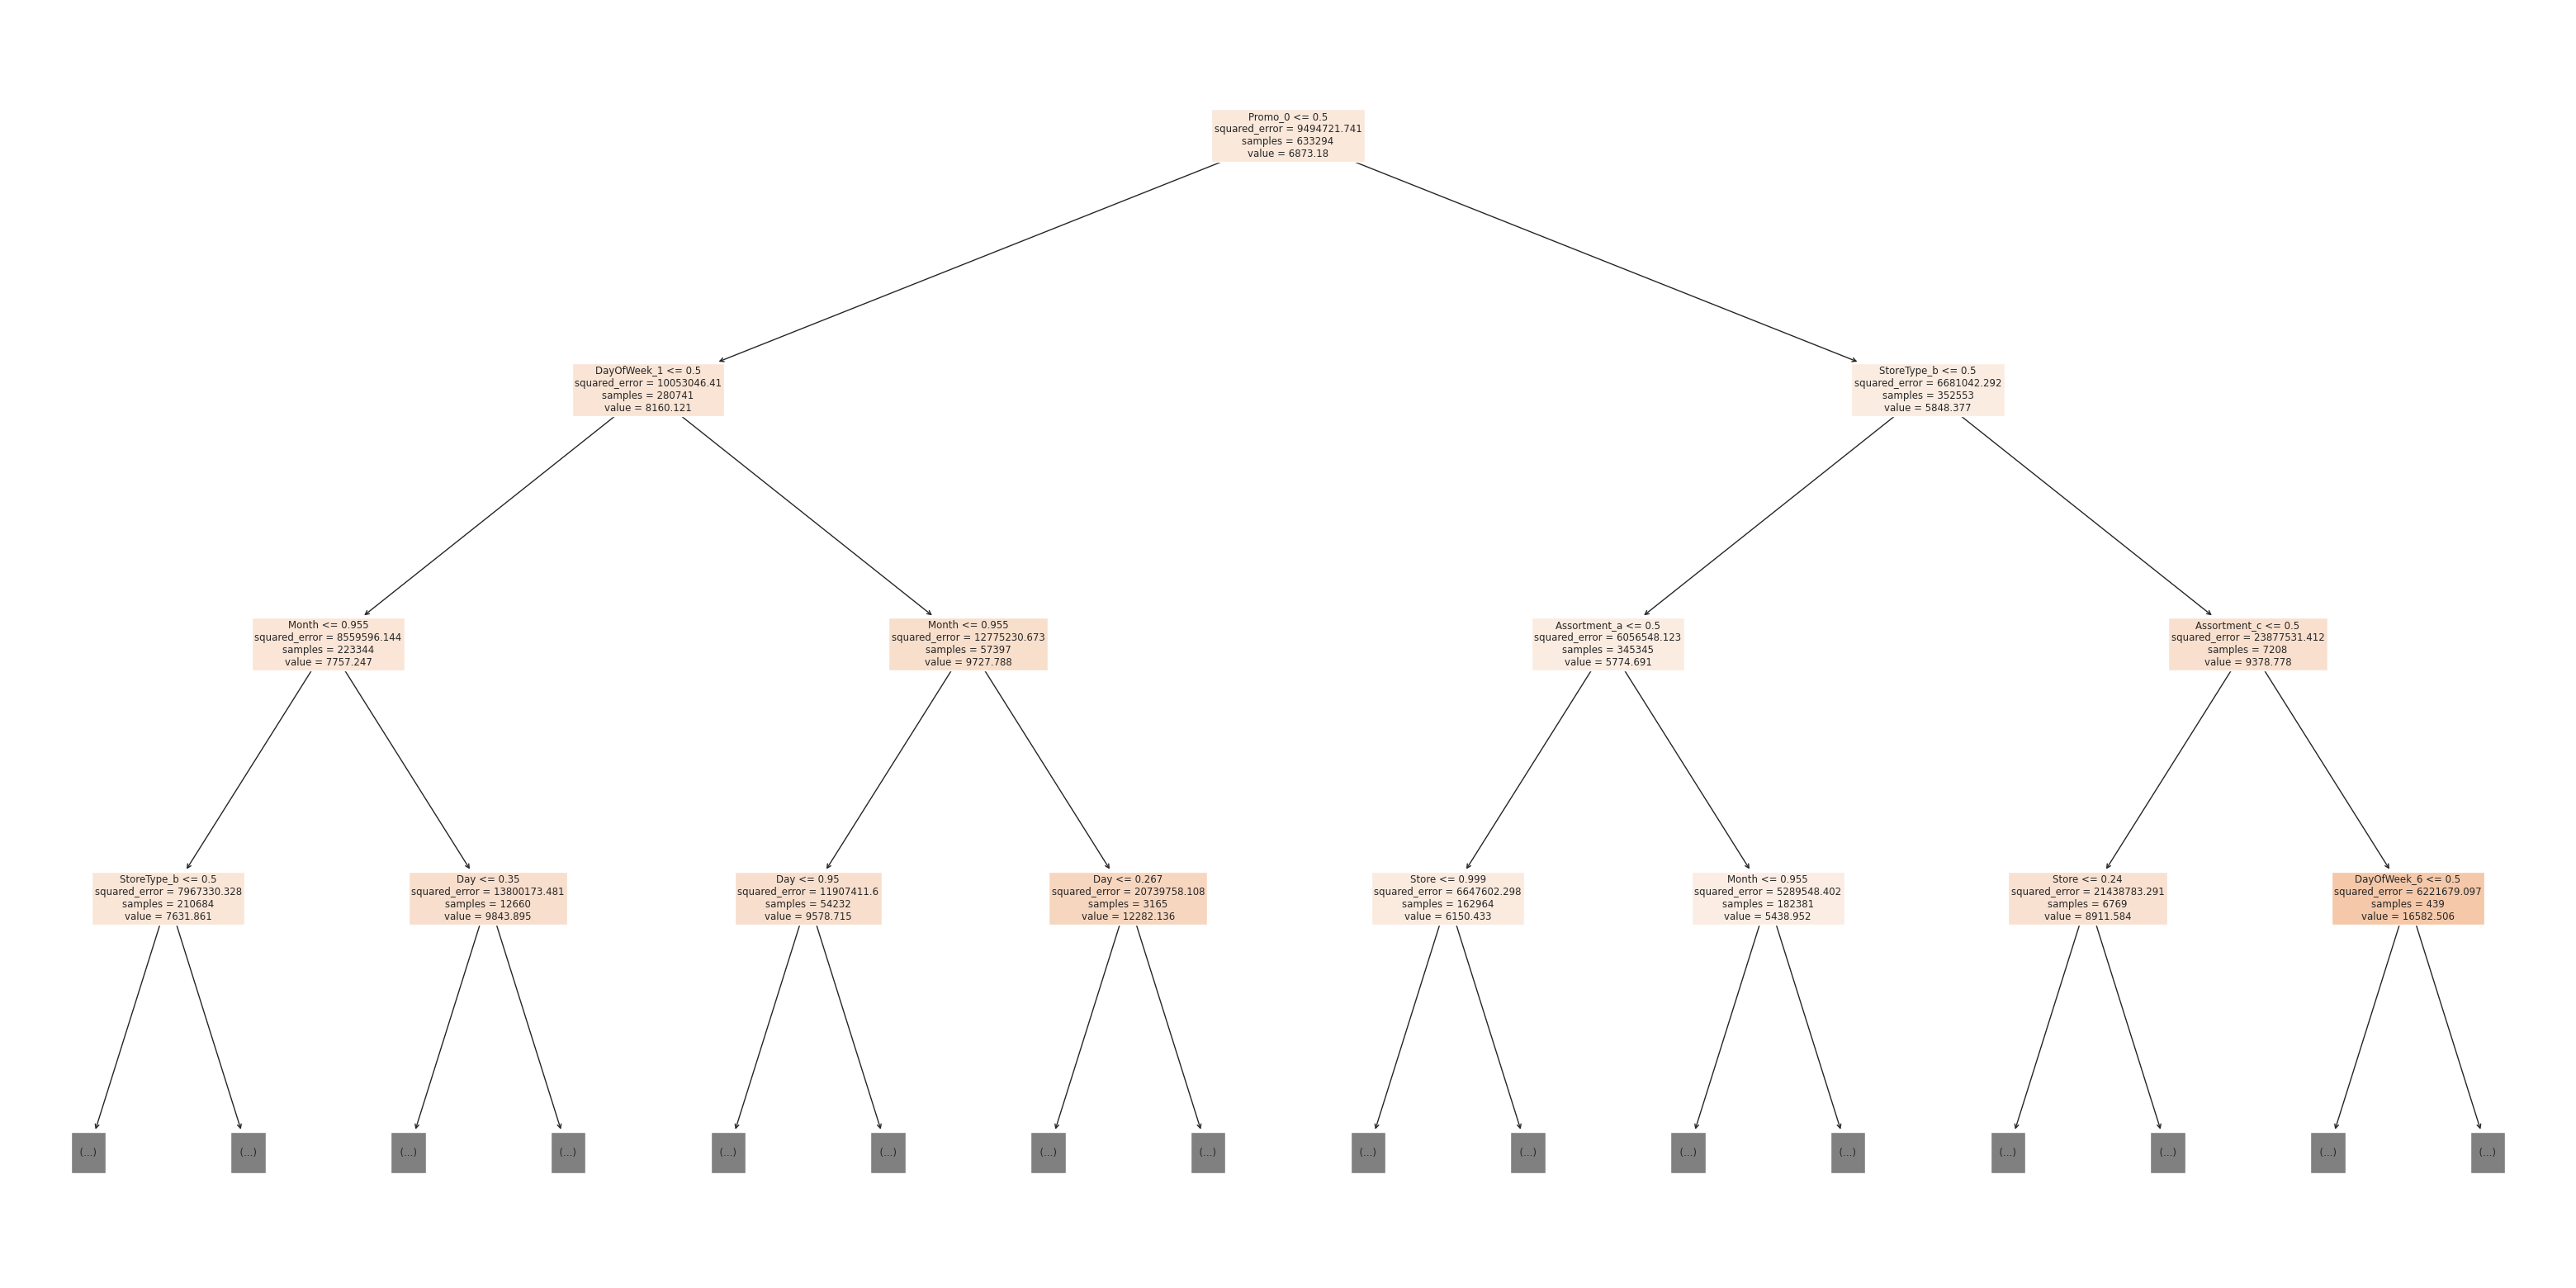

In [126]:
plt.figure(figsize=(40, 20))
plot_tree(tree, filled=True, max_depth=3, feature_names=numerical_cols+encoded_cols)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
try_model(rf)

(474.9198974666898, 1371.7321923469985)